In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Sleep_health= pd.read_csv('/notebooks/datasets/Sleep_health_and_lifestyle_dataset.csv')

In [32]:
print(Sleep_health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    object 
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 38.1+ KB
None


In [33]:
Sleep_health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


 #Correlation between Sleep Duration and Stress Level

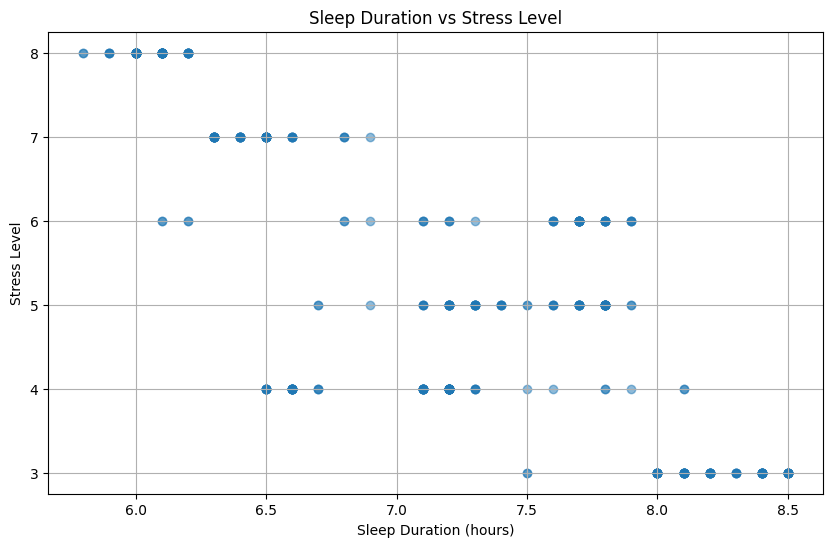

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(Sleep_health['Sleep Duration'],Sleep_health['Stress Level'], alpha=0.5)
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.grid()
plt.savefig('sleep_vs_Stress Level.png')
plt.show()

<Axes: xlabel='Quality of Sleep', ylabel='Stress Level'>

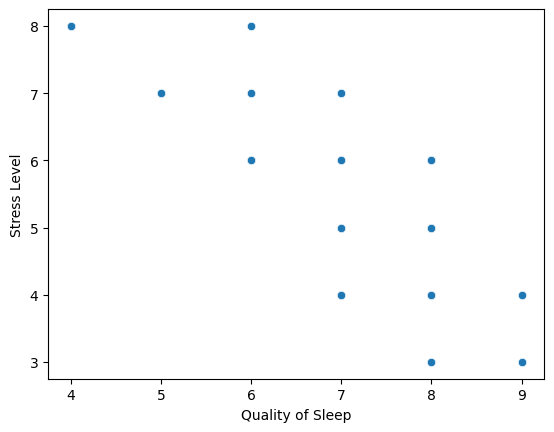

In [35]:
sns.scatterplot(data=Sleep_health, x='Quality of Sleep', y='Stress Level')

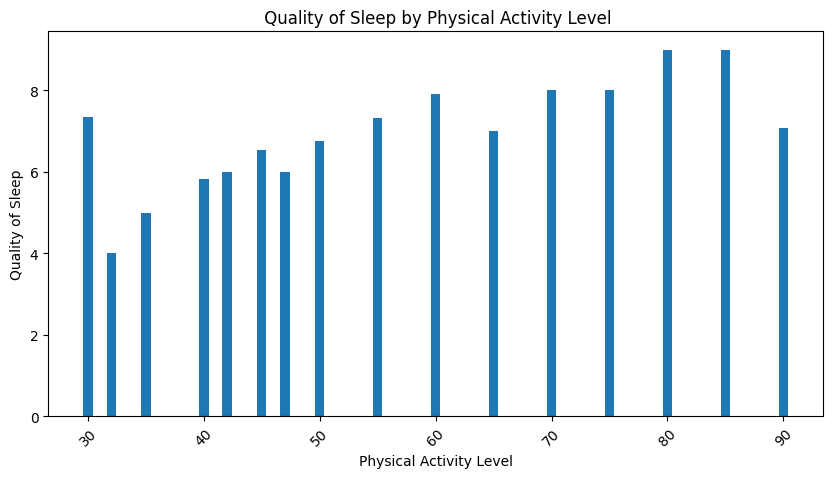

In [36]:
#Grouping by physical activity level and calculating average sleep quality
activity_sleep_quality = Sleep_health.groupby('Physical Activity Level')['Quality of Sleep'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(activity_sleep_quality['Physical Activity Level'], activity_sleep_quality['Quality of Sleep'])
plt.title(' Quality of Sleep by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()


# Melt/Pivot columns "Age", "Sleep Duration", "Occupation",and "Stress Level"  then display the top 5 line and the bottom 5 lines. 
#  Display a filtered sample of the melted data showing only the Obese BMI Category.

In [37]:
melted_Sleep_health  = pd.melt(Sleep_health, id_vars=['BMI Category'], value_vars=['Age', 'Sleep Duration', 'Occupation', 'Stress Level'])

In [38]:
Obese = melted_Sleep_health[melted_Sleep_health['BMI Category'] == 'Obese']

In [39]:
print(melted_Sleep_health.head())
print(melted_Sleep_health.tail())

  BMI Category variable value
0   Overweight      Age    27
1       Normal      Age    28
2       Normal      Age    28
3        Obese      Age    28
4        Obese      Age    28
     BMI Category      variable value
1491   Overweight  Stress Level     3
1492   Overweight  Stress Level     3
1493   Overweight  Stress Level     3
1494   Overweight  Stress Level     3
1495   Overweight  Stress Level     3


In [40]:
print(Obese )

     BMI Category        variable                 value
3           Obese             Age                    28
4           Obese             Age                    28
5           Obese             Age                    28
6           Obese             Age                    29
93          Obese             Age                    35
145         Obese             Age                    38
264         Obese             Age                    48
266         Obese             Age                    48
276         Obese             Age                    49
277         Obese             Age                    49
377         Obese  Sleep Duration                   5.9
378         Obese  Sleep Duration                   5.9
379         Obese  Sleep Duration                   5.9
380         Obese  Sleep Duration                   6.3
467         Obese  Sleep Duration                   7.4
519         Obese  Sleep Duration                   7.4
638         Obese  Sleep Duration               

# Provide a count of all the missing values for columns "Daily Steps" and "Sleep Disorder".
# Use interpolate to fill missing values for rows 7 - 17 and columns 0 - 8. 
# Display a second subset for data that fills missing values with "none" for rows 7 - 17 and columns 0 - 8.


In [41]:
missing_values_count = {
    'Daily Steps': Sleep_health['Daily Steps'].isnull().sum(),
    'Sleep Disorder': Sleep_health['Sleep Disorder'].isnull().sum()
}

In [42]:
{
    'Daily Steps': Sleep_health['Daily Steps'].isnull().sum(),
    'Sleep Disorder': Sleep_health['Sleep Disorder'].isnull().sum()
}

{'Daily Steps': np.int64(0), 'Sleep Disorder': np.int64(219)}

In [43]:
print("Count of missing values:")
print(missing_values_count)

Count of missing values:
{'Daily Steps': np.int64(0), 'Sleep Disorder': np.int64(219)}


In [44]:
#Interpolate to fill missing values for rows 7 - 17 and columns 0 - 8
Sleep_health.iloc[7:18, 0:9] = Sleep_health.iloc[7:18, 0:9].interpolate()

C:\Users\sange\AppData\Local\Temp\ipykernel_61896\3880138255.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Sleep_health.iloc[7:18, 0:9] = Sleep_health.iloc[7:18, 0:9].interpolate()


In [45]:
print("\nData after interpolation:")
print(Sleep_health.iloc[7:18, 0:9])


Data after interpolation:
    Person ID  Gender Age Occupation  Sleep Duration  Quality of Sleep  \
7           8    Male  29     Doctor             7.8                 7   
8           9    Male  29     Doctor             7.8                 7   
9          10    Male  29     Doctor             7.8                 7   
10         11    Male  29     Doctor             6.1                 6   
11         12    Male  29     Doctor             7.8                 7   
12         13    Male  29     Doctor             6.1                 6   
13         14    Male  29     Doctor             6.0                 6   
14         15    Male  29     Doctor             6.0                 6   
15         16    Male  29     Doctor             6.0                 6   
16         17  Female  29      Nurse             6.5                 5   
17         18    Male  29     Doctor             6.0                 6   

    Physical Activity Level  Stress Level   BMI Category  
7                        

Display the current data type of the "Age" value in the Sleep_health dataset. 
Change the date type of the "Age" value from "int64" to "object". Then display the changed data type.

In [47]:
print(Sleep_health['Age'].dtype)

object


In [48]:
Sleep_health['Age'] = Sleep_health['Age'].astype('object')

In [49]:
print(Sleep_health['Age'].dtype)

object


In [50]:
print("Aggregation ")

(Sleep_health
.groupby(['Occupation','Sleep Duration','BMI Category','Stress Level'])['Stress Level']
.mean())

Aggregation 


Occupation  Sleep Duration  BMI Category   Stress Level
Accountant  6.5             Overweight     7               7.0
            6.6             Overweight     7               7.0
            7.1             Normal         4               4.0
            7.2             Normal         4               4.0
                            Normal Weight  6               6.0
                                                          ... 
Teacher     6.7             Overweight     5               5.0
            6.8             Overweight     6               6.0
                                           7               7.0
            7.1             Normal         4               4.0
            7.2             Normal         4               4.0
Name: Stress Level, Length: 75, dtype: float64

Based upon this aggregation, which Occupation has the highest stress level?

Accountant